## Exercise solution

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

rng = np.random.default_rng(1234)
N = 3000

In [2]:
xy = rng.uniform(low=0., high=1., size=[2,N])
v = np.sum(xy**2, axis=0)

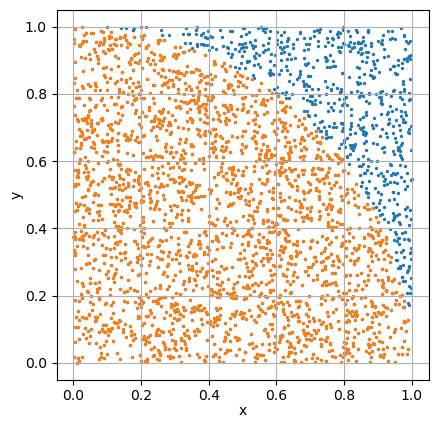

In [3]:
w, h = plt.figaspect(1.)
plt.figure(figsize=(w,h))

plt.grid(True)
plt.xlabel('x',labelpad=0.5)
plt.ylabel('y',labelpad=0.5)
plt.scatter(xy[0,:], xy[1,:], s=2)
plt.scatter(xy[0,:][v<1], xy[1,:][v<1],  s=2)

In [4]:
values = np.cumsum(np.sum(rng.uniform(0,1,size=[2,N])**2,axis=0)<1) \
/(np.arange(1,N+1))*4

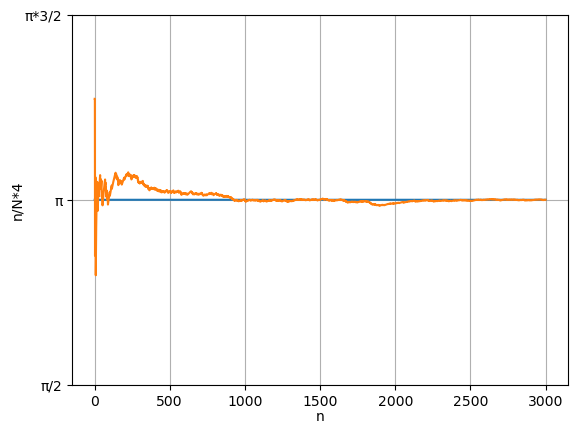

In [5]:
plt.grid(True)
plt.xlabel('n',labelpad=0.5)
plt.ylabel('n/N*4',labelpad=0.5)
plt.plot(np.arange(1,N+1), np.ones(N)*np.pi)
plt.plot(np.arange(1,N+1), values)
plt.yticks([np.pi/2, np.pi, np.pi*1.5], [u'\u03c0/2',u'\u03c0',u'\u03c0*3/2'] )
plt.show()

you can do the plot in logscale and with $\frac{1}{\sqrt(N)}$

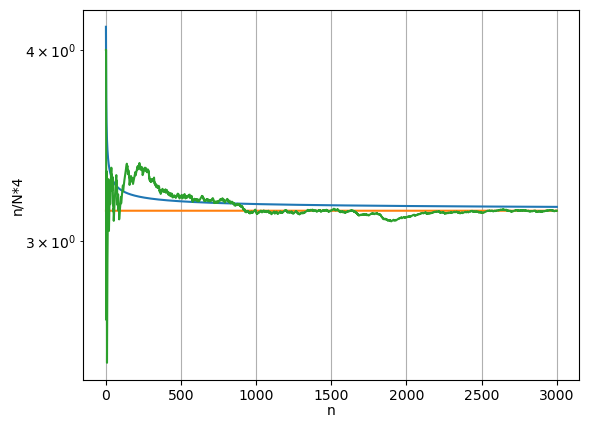

In [6]:
plt.grid(True)
plt.xlabel('n',labelpad=0.5)
plt.ylabel('n/N*4',labelpad=0.5)
plt.plot(np.arange(1,N+1), 1/np.sqrt(np.arange(1,N+1))+np.pi)
plt.plot(np.arange(1,N+1), np.ones(N)*np.pi)
plt.plot(np.arange(1,N+1), values)
plt.yticks([np.pi/2, np.pi, np.pi*1.5], [u'\u03c0/2',u'\u03c0',u'\u03c0*3/2'] )
plt.yscale('log')
plt.show()

# If you really feel lost without ROOT

<img src="root.png">

## You can import ROOT in python

If you setted correctly also the `PYTHONPATH` environment variable
(the `thisroot.sh` script should)

In [7]:
!echo $PYTHONPATH

In [8]:
import sys
for s in sys.path:
    if "root" in s:
        print(s)

### And then you can use ROOT in python

In [9]:
import ROOT

ModuleNotFoundError: No module named 'ROOT'

Essentially in the same way as in C++

In [10]:
h = ROOT.TH1F("h2","h2",100,-20,20)

NameError: name 'ROOT' is not defined

In [11]:
h.FillRandom('gaus',1000)

AttributeError: 'numpy.float64' object has no attribute 'FillRandom'

In [12]:
c = ROOT.TCanvas("c","c",800,600)

NameError: name 'ROOT' is not defined

In [13]:
h.Draw()

AttributeError: 'numpy.float64' object has no attribute 'Draw'

You have to `Draw` the TCanvas to see something...

In [14]:
c.Draw()

NameError: name 'c' is not defined

## Pay attention!!

Old versions of ROOT do not throw an exception if there is an error in reading the file

But just a message

therefore if you read the file in a verbose script you may not see the error and it can keep running...

Let me suggest you to wrap the ROOT function to raise an exception in case the file reading has problems:

In [15]:
def my_read_rootfile(filename):
    inputfile = ROOT.TFile(filename,'READ')
    if not inputfile.IsOpen():
        raise FileNotFoundError("file",filename,"not found")
    if inputfile.IsZombie():
        raise OSError("error opening the file",filename)
        
my_read_rootfile('nonexisting.root')

NameError: name 'ROOT' is not defined

## uproot

A good alternative to installing ROOT is uproot

* a library for reading and writing ROOT files in pure Python and numpy
* part of the Scikit-HEP project, a collection of Python tools for HEP data analysis
* can work WITHOUT ROOT installed

Let's have a look on how to use it on the output of the Geant4 AnaEx01 extended example

In [20]:
import uproot

you can open a file as:

In [21]:
!wget http://www.roma1.infn.it/~mancinit/Teaching/Alghero22/AnaEx01.root

In [22]:
file = uproot.open('AnaEx01.root')

and check the list of keys in the file:

In [23]:
file.keys()

['histo;1',
 'histo/EAbs;1',
 'histo/EGap;1',
 'histo/LAbs;1',
 'histo/LGap;1',
 'ntuple;1',
 'ntuple/Ntuple1;1',
 'ntuple/Ntuple2;1']

Get one of the TTrees

In [24]:
tree = file['ntuple/Ntuple1']

check the keys of that TTree

In [25]:
tree.keys()

['Eabs', 'Egap']

and get the branches

In [26]:
branches = tree.arrays()

In [ ]:
branches['Egap']

In [ ]:
type(branches['Egap'])

finally you can use them (almost) as numpy arrays

for instance, you can do an histogram

In [ ]:
import matplotlib.pyplot as plt

(array([  1.,  32., 136., 259., 247., 177.,  92.,  44.,   9.,   3.]),
 array([ 2.71100092,  7.56506954, 12.41913817, 17.27320679, 22.12727542,
        26.98134405, 31.83541267, 36.6894813 , 41.54354992, 46.39761855,
        51.25168717]),
 <BarContainer object of 10 artists>)

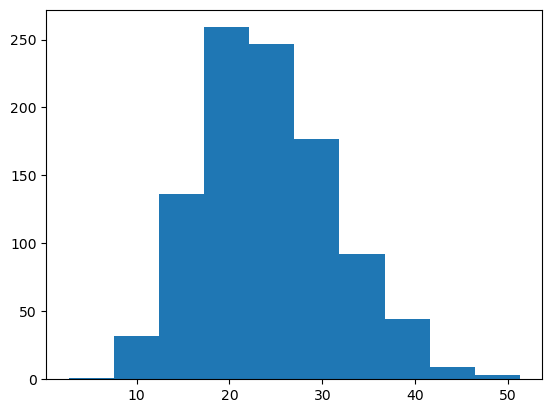

In [27]:
plt.hist(branches['Egap'])

and make analysis

(array([ 1.,  5., 22., 48., 79., 70., 59., 35.,  9.,  3.]),
 array([ 2.71100092,  7.56506954, 12.41913817, 17.27320679, 22.12727542,
        26.98134405, 31.83541267, 36.6894813 , 41.54354992, 46.39761855,
        51.25168717]),
 <BarContainer object of 10 artists>)

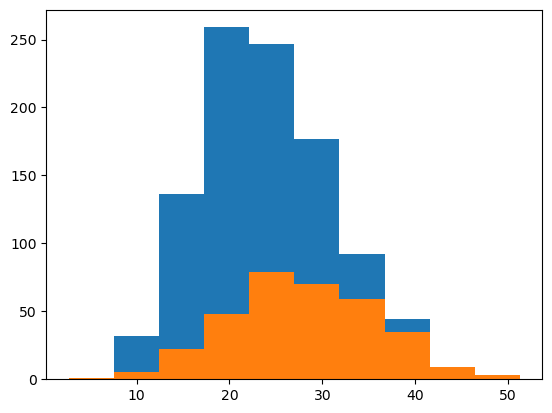

In [28]:
plt.hist(branches['Egap'])
plt.hist(branches['Egap'][branches['Eabs']<450])

you may have some problem with the fact that the output is not a numpy array

AttributeError: no field named 'T'

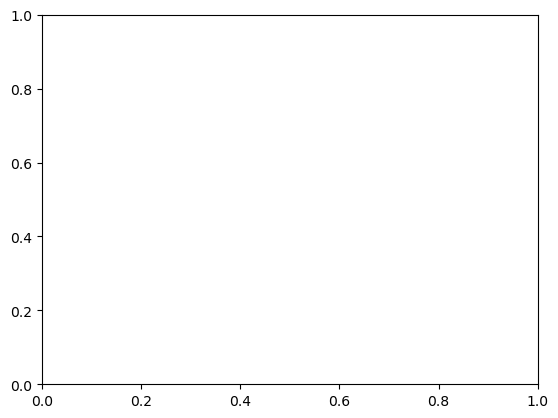

In [29]:
plt.hist2d(branches['Egap'],branches['Egap'])

ROOT data can be not rectangular

numpy is designed to work with rectangular arrays

In [30]:
#rectangular array
[[0, 1],
 [2, 3],
 [4, 5],
 [6, 7],
 [8, 9]]

[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]

In [31]:
#jagged array
[[0, 1],
 [2, 3, 4],
 [5],
 [6, 7],
 [8, 9]]

[[0, 1], [2, 3, 4], [5], [6, 7], [8, 9]]

## Awkward Array 
a package used to deal with jagged arrays 

methods pretty similar to numpy

In [32]:
import awkward as ak

if the data are numerical and regular can be losslessly converted to a numpy array

<function matplotlib.pyplot.show(close=None, block=None)>

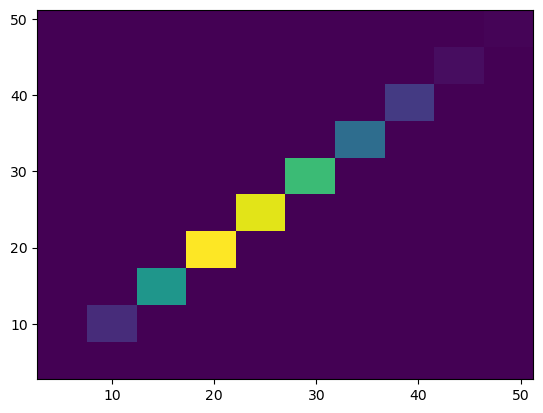

In [33]:
plt.hist2d(ak.to_numpy(branches['Egap']),ak.to_numpy(branches['Egap']));
plt.show